In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

mpl.rc('font', family='AppleGothic')  
plt.rcParams['axes.unicode_minus'] = False


processed_df = pd.read_csv('../../data/pediatric/processed_data.csv',encoding='cp949')
processed_df

,행정구역,소아청소년과,소아청소년_인구수,10만명당_병원수
0,강원특별자치도,112,212406,52.729207
1,경기도,1404,2258295,62.170797
2,경상남도,190,509149,37.317170
3,경상북도,144,356011,40.448188
4,광주광역시,82,238255,34.416906
5,대구광역시,236,354666,66.541478
6,대전광역시,112,227126,49.311836
7,부산광역시,282,444588,63.429512
8,서울특별시,456,1204547,37.856555
9,세종특별자치시,54,93890,57.514112


In [14]:
processed_df['10만명당_병원수'].describe()

count    17.000000
mean     47.890013
std      13.088112
min      19.394428
25%      37.856555
50%      49.311836
75%      59.312986
max      66.541478
Name: 10만명당_병원수, dtype: float64

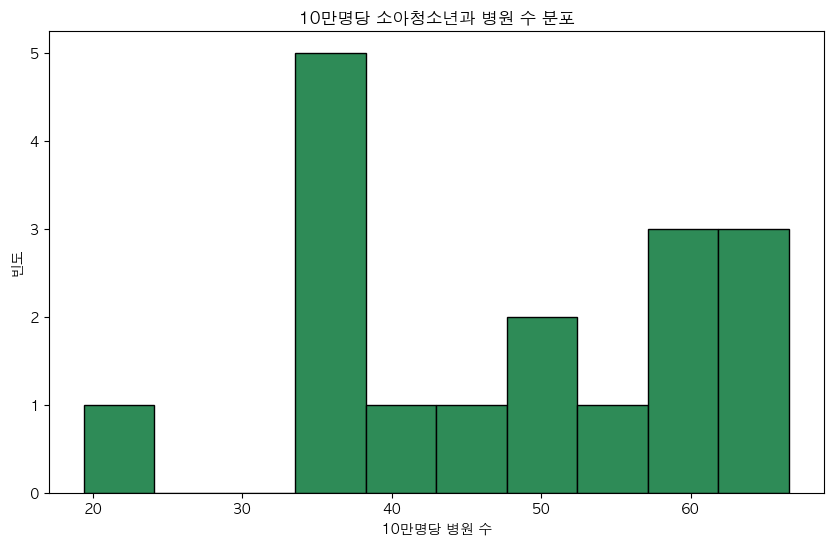

In [41]:
plt.figure(figsize=(10,6))
plt.hist(processed_df['10만명당_병원수'], bins=10, edgecolor='black',color = 'seagreen')

plt.title('10만명당 소아청소년과 병원 수 분포')
plt.xlabel('10만명당 병원 수')
plt.ylabel('빈도')

plt.show()

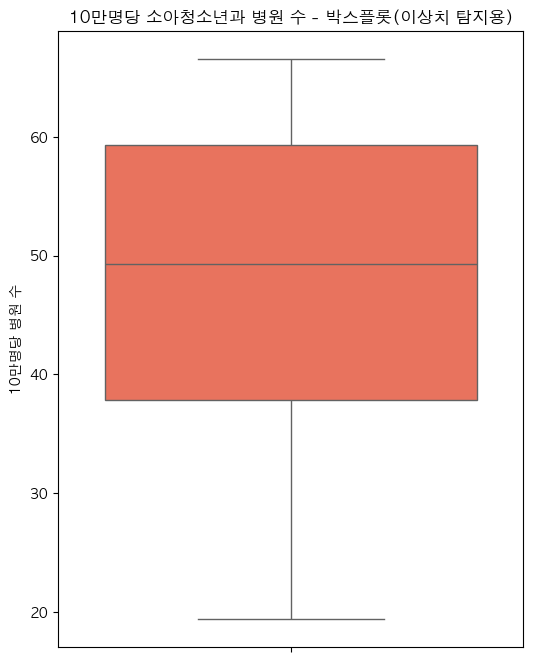

In [42]:
plt.figure(figsize=(6, 8))
sns.boxplot(y=processed_df['10만명당_병원수'],color = 'tomato')

plt.title('10만명당 소아청소년과 병원 수 - 박스플롯(이상치 탐지용)')
plt.ylabel('10만명당 병원 수')

plt.show()


/var/folders/80/x9ztm2rs5c33hn_3qt3qb6ww0000gn/T/ipykernel_15182/2360040536.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/80/x9ztm2rs5c33hn_3qt3qb6ww0000gn/T/ipykernel_15182/2360040536.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


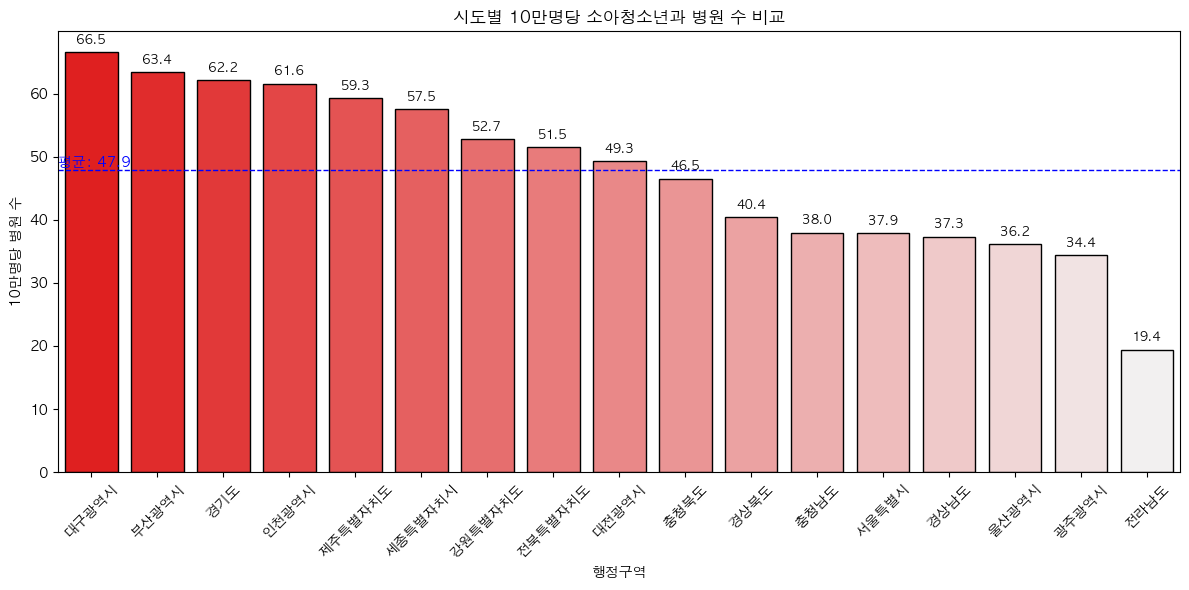

In [ ]:
sorted_df = processed_df.sort_values(by='10만명당_병원수', ascending=False)

plt.figure(figsize=(12, 6))
palette = sns.light_palette("red", n_colors=len(sorted_df))
palette.reverse()

# 막대 위에 값 표시
for idx, val in enumerate(sorted_df['10만명당_병원수']):
    plt.text(idx, val + 1, f'{val:.1f}', ha='center', va='bottom', fontsize=9)

sns.barplot(
    data=sorted_df,
    x='행정구역',
    y='10만명당_병원수',
    palette=palette
)

# 평균선 추가
avg = processed_df['10만명당_병원수'].mean()
plt.axhline(avg, color='blue', linestyle='--', linewidth=1)
plt.text(-0.5, avg + 0.5, f'평균: {avg:.1f}', color='blue')

plt.title('시도별 10만명당 소아청소년과 병원 수 비교')
plt.xlabel('행정구역')
plt.ylabel('10만명당 병원 수')

sns.barplot(
    data=sorted_df,
    x='행정구역',
    y='10만명당_병원수',
    palette=palette,
    edgecolor='black'
)
plt.xticks(rotation=45)   
plt.tight_layout()
plt.show()

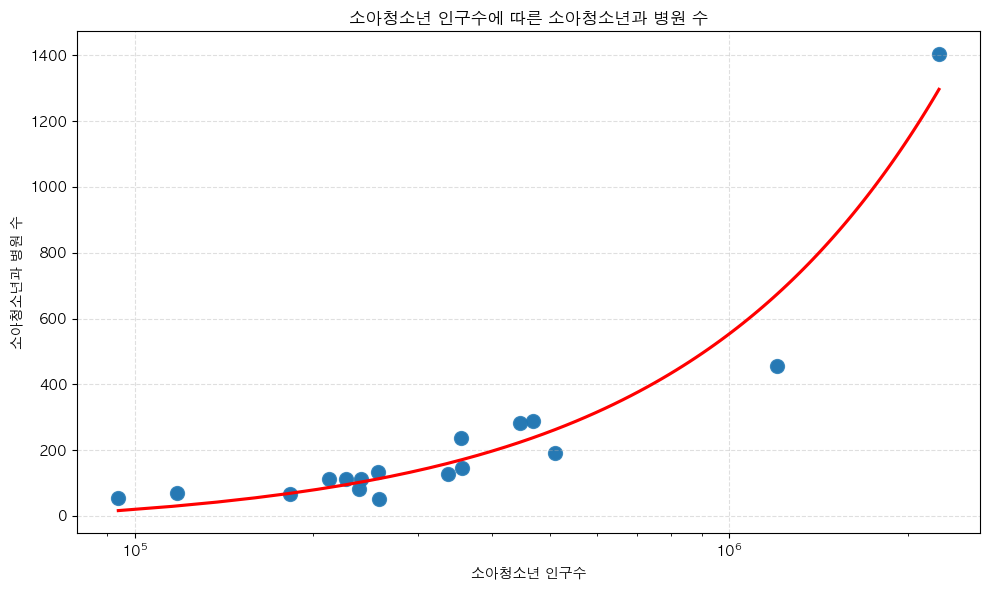

In [39]:
plt.figure(figsize=(10, 6))
plt.ticklabel_format(style='plain', axis='x')

# 로그 스케일 설정
plt.xscale('log')

sns.scatterplot(
    data=processed_df,
    x='소아청소년_인구수',
    y='소아청소년과',
    s=100,          # 점 크기
    color='steelblue'  # 기본 색
)
# 회귀선 추가
sns.regplot(
    data=processed_df,
    x='소아청소년_인구수',
    y='소아청소년과',
    scatter_kws={'s':100},
    line_kws={'color':'red'},
    ci=None
)
plt.title('소아청소년 인구수에 따른 소아청소년과 병원 수')
plt.xlabel('소아청소년 인구수')
plt.ylabel('소아청소년과 병원 수')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

In [40]:
processed_df[['소아청소년_인구수','소아청소년과']].corr()

,소아청소년_인구수,소아청소년과
소아청소년_인구수,1.000000,0.973898
소아청소년과,0.973898,1.000000
